### Notebook by [Volkan Sonmez](http://www.pythonicfool.com/)  
### Digits recognition with Pytorch and Tensorflow (TF_Keras) on MNIST Dataset
##### [Pythonicfool GitHub Repository](https://github.com/volkansonmez/Exploratory_Data_Analysis_and_ML_Projects)


## Table of contents

1. [Introduction](#Introduction)

2. [EDA and Building ML Models](#EDA_and_Building_ML_Models)
    
3. [Pytorch_Model](#Pytorch_Model)
   
4. [Tensorflow.Keras_Model](#Tensorflow.Keras_Model)

5. [Conclusion](#Conclusion)

## Introduction

[[ go back to the top ]](#Table-of-contents)

MNIST is a large dataset of handwritten digits (0 to 9) that is commonly used for training various image processing systems containing 60,000 training images and 10,000 testing images. Each image has 28x28 pixels. Recognizing digits is a multi-class logistic regression problem. 
    
> MNIST dataset can be downloaded from: https://www.kaggle.com/oddrationale/mnist-in-csv  

In this notebook, the MNIST dataset was trained on PyTorch and Keras (Tensorflow) packages, and their performances were tested. Both models have identical architecture. The order of layers was picked with this configuration: 
> (2 x (Conv Layer, Regularization, Max Pool Layer, Activation Function) + a fully connected layer.) 

The logits of FCL were then passed to the softmax function. 

## EDA_and_Building_ML_Model

[[ go back to the top ]](#Table-of-contents)

This notebook uses several Python packages that come standard with the Anaconda Python distribution. 
The primary libraries you need to run this notebook are:

* **NumPy**: Provides a fast numerical array structure and helper functions.
* **pandas**: Provides a DataFrame structure to store data in memory and work with it easily and efficiently.
* **scikit-learn**: The essential Machine Learning package in Python.
* **matplotlib**: Basic plotting library in Python; most other Python plotting libraries are built on top of it.
* **Seaborn**: Advanced statistical plotting library.

To make sure you have all of the packages you need, install them with `conda`:

    conda install numpy pandas matplotlib tensorflow pytorch seaborn

How to do it: 

The dataset is in .csv format so it is very easy to read it with pandas library. View some of the instances with the matplotlib.pyplot.imshow module. 

Use torch.utils.data.DataLoader module to create iterable batches of training and test sets for the PyTorch model. 

>Using Pytorch: 

Create a model by using the torch.nn module. Here is a rule of thumb architecture for a very simple model: 2 x (Conv Layer, Regularization, Max Pool Layer, Activation Function) + 1 FCL + Softmax. The cross-entropy loss function should be used since this is a multi-class logistic regression problem. For the sake of simplicity, default hyper-parameters were used both for the optimizer and loss functions.


>Using Tensorflow-Keras: 

Like building pytorch's easy-to-build sequential model, TensorFlow has Keras module. The same architecture above can be written just with 10 lines of code. 

Compare the results of these two models. 

#### Exploratory Data Analysis of MNIST and the Machine Learning Modeling of MNIST Dataset with PyTorch and Tf-Keras


In [1]:
# Import the necessary libraries

import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [2]:
# Download the MNIST dataset to the same working folder. Load the data into pandas dataframe.

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
# View the properties of the dataframe

print(train.shape, test.shape)
print(train.describe())
print(train['label'].head())

(42000, 785) (28000, 784)
              label   pixel0   pixel1   pixel2   pixel3   pixel4   pixel5  \
count  42000.000000  42000.0  42000.0  42000.0  42000.0  42000.0  42000.0   
mean       4.456643      0.0      0.0      0.0      0.0      0.0      0.0   
std        2.887730      0.0      0.0      0.0      0.0      0.0      0.0   
min        0.000000      0.0      0.0      0.0      0.0      0.0      0.0   
25%        2.000000      0.0      0.0      0.0      0.0      0.0      0.0   
50%        4.000000      0.0      0.0      0.0      0.0      0.0      0.0   
75%        7.000000      0.0      0.0      0.0      0.0      0.0      0.0   
max        9.000000      0.0      0.0      0.0      0.0      0.0      0.0   

        pixel6   pixel7   pixel8  ...      pixel774      pixel775  \
count  42000.0  42000.0  42000.0  ...  42000.000000  42000.000000   
mean       0.0      0.0      0.0  ...      0.219286      0.117095   
std        0.0      0.0      0.0  ...      6.312890      4.633819   
min 

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


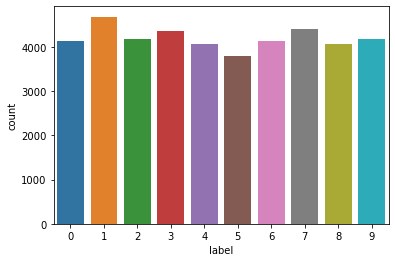

In [4]:
# View the target values in the data

Y_train = train["label"]
X_train = train.drop("label", axis = 1) # all the data except the labels
print(sorted(Y_train.unique()))
sns.countplot(Y_train)

In [5]:
# Convert the dataframe into an n-dimensional numpy array

X_train = np.array(X_train)
Y_train = np.array(Y_train)
print(Y_train.shape) # check the shape
print(len(X_train[Y_train == 0])) # view the number of instances represent 0 on the dataset

(42000,)
4132


In [6]:
# View a random instance with imshow module.

plt.imshow(X_train[0].reshape(28,28), cmap = plt.cm.binary)
print(X_train[0].shape)

(784,)


In [7]:
# View a sample instance from all 10 different labels

fig, ax = plt.subplots(nrows=1, ncols=10, sharex=True, sharey=True)
for i in range(10):
    img = X_train[Y_train == i][0].reshape(28, 28)
    ax[i].imshow(img,  cmap='Greys')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.show()

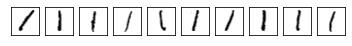

In [8]:
# View the different instances under the same category (target value)

fig, ax = plt.subplots(nrows=1, ncols=10, sharex=True, sharey=True,)
for i in range(10):
    img = X_train[Y_train == 1][i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.show()

#### End of Explatory Data Analysis and Beginning of the NN model with CNNs ####

## Pytorch_Model

[[ go back to the top ]](#Table-of-contents)

Using Torch and CNN, here is the NN architecture to develop a ML model that can predict digits with 98% accuracy: 

Upload the data from torchvision datasets instead of using the dataset downloaded earlier.
Build this model: input ---> conv1, dropout1, maxpool1, relu1, conv2, dropout2, maxpool2, fcl, softmax ---> output

Here is the size and shape of each layer and the explanation of the forward propagation:

1 x 28 x 28 ---> (1,10) 5x5 conv1 ----> 10 x 24 x 24 -----> dropout----> maxpool(2,2) ----> 10 x 12 x 12 ----> 
relu ----> (10,20) 5x5 conv2 ---->  

20 x 8 x 8  -----> dropout -----> maxpool2(2,2) ----> 20 x 4 x 4 ----> fcl (320, 10) ----> softmax <----> LOSS 

Note: Use relu activation function right after maxpools for regularization to achieve best results.

In [9]:
# Create the model with Pytorch

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable

# Download and normalize the training dataset
train_loader = torch.utils.data.DataLoader(datasets.MNIST('../mnist_data', download=True, train=True,
                                                          transform=transforms.Compose([
                                                          transforms.ToTensor(), 
                                                          transforms.Normalize((0.1307,), (0.3081,))
                                                          ])), batch_size=10, shuffle=True)

# Download and normalize the testing dataset
test_loader = torch.utils.data.DataLoader(datasets.MNIST('../mnist_data', download=True, train=False,
                                                          transform=transforms.Compose([
                                                              transforms.ToTensor(), 
                                                              transforms.Normalize((0.1307,), (0.3081,)) 
                                                          ])), batch_size=10, shuffle=True)


device = 'cpu'
class Net(torch.nn.Module):
    def __init__(self):
        torch.nn.Module.__init__(self)
        self.conv1 = torch.nn.Conv2d(1, 10, kernel_size = 5) # in , out, kernel size
        self.conv2 = torch.nn.Conv2d(10, 20, kernel_size = 5) # in , out, kerner size
        self.fcl1 = torch.nn.Linear(320, 10) # in, out 
        
        
    def forward(self, x):
        x = self.conv1(x)  # input 1 x 28 x 28 ---> (1,10) 5x5 conv1 ----> output 10 x 24 x 24 
        x = torch.nn.functional.dropout(x) # 10 x 24 x 24 
        x = torch.nn.functional.max_pool2d(x, 2) # maxpool1(2,2) ----> 10 x 12 x 12 
        x = torch.relu(x) # 10 x 12 x 12 
        x = self.conv2(x) # input 10 x 12 x 12 ----> (10,20) 5x5 conv2 ----> output 20 x 8 x 8 
        x = torch.nn.functional.dropout(x) # 20 x 8 x 8 
        x = torch.nn.functional.max_pool2d(x, 2) # maxpool2(2,2) ----> 20 x 4 x 4
        x = torch.relu(x) # 20 x 4 x 4
        x = x.view(-1, 320) # input 20 x 4 x 4 ----> output (1 x 320)
        x = self.fcl1(x) # input (1 x 320)----> output (10)
        x = torch.nn.functional.log_softmax(x, dim = 1) # output softmax of 10 scores 
        return x
        
net = Net().to(device)
optimizer = torch.optim.Adam(net.parameters())
criterion = torch.nn.CrossEntropyLoss()
model_parameters = {}

def train(epoch, save = False):
    net.train() # this is the built-in "train" function of the sequential NN model.
    for ep in range(epoch):
        for idx , (image, label) in enumerate(train_loader): 
            # forward pass
            fwd = net.forward(image)
            # loss
            loss = criterion(fwd, label)
            # print loss
            if idx % 6000 == 0: # each batch is 64 instances
                print('loss is: {}'.format(loss))
                # print('shape of input', image.shape)
            # zero the grads
            optimizer.zero_grad()
            # backward pass
            loss.backward()
            # update the parameters
            optimizer.step()
        if save:
        # save the trained model parameters
            model_parameters = {'model': net.state_dict() , 'optim' : optimizer.state_dict()}
            path = 'model_params{}.pth'.format(ep) # save the model parameters under the current working directory
            torch.save(model_parameters , path)
            print('model parameters is saved: {}'.format(path))
    #test the data
    test()
        
        
def test():
    correct = 0
    test_loss = 0
    net.eval()
    with torch.no_grad():
        for idx , (image, label) in enumerate(test_loader):
            # forward pass
            logit = net(image)
            # calculate loss
            test_loss += criterion(logit, label).sum()
            # compare logit and actual results
            pred_idx = logit.max(1, keepdim = True)[1] # it is the np.argmax on axis = 1
            correct += pred_idx.eq(label.view_as(pred_idx)).sum()
    accuracy = 100 * correct / float(len(test_loader.dataset))
    print('accuracy is: {}'.format(accuracy))
    

        
train(15, save = False) # this is an intentional overfit to observe the fluctuations in the loss values below

Extracting ../mnist_data/MNIST/raw/train-images-idx3-ubyte.gz to ../mnist_data/MNIST/raw


Extracting ../mnist_data/MNIST/raw/train-labels-idx1-ubyte.gz to ../mnist_data/MNIST/raw


Extracting ../mnist_data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../mnist_data/MNIST/raw


Extracting ../mnist_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../mnist_data/MNIST/raw
Processing...


/Users/volkansonmez/miniconda/lib/python3.7/site-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Done!


loss is: 2.2543179988861084
loss is: 0.1970173716545105
loss is: 0.22992321848869324
loss is: 0.056348931044340134
loss is: 2.9585873562609777e-05
loss is: 0.7805323600769043
loss is: 0.0032805223017930984
loss is: 0.0011950669577345252
loss is: 0.038494713604450226
loss is: 0.014764678664505482
loss is: 0.0004260221030563116
loss is: 0.0009565182263031602
loss is: 8.678420272190124e-05
loss is: 0.00027247617254033685
loss is: 0.006663521286100149
accuracy is: 98.0199966430664


## Tensorflow.Keras_Model

[[ go back to the top ]](#Table-of-contents)

In [10]:
# Using TF Keras for the same problem with a pre-fixed 2 fcl architecture for warm up:
# Uploading data from keras datasets instead of using the torchvision dataset

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import tensorflow as tf
mnist = tf.keras.datasets.mnist # 28 x 28 images of hand-written digits
(x_train, y_train), (x_test, y_test) = mnist.load_data()


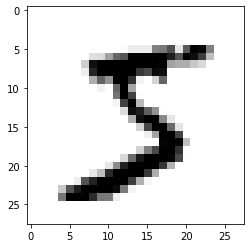

In [11]:
plt.imshow(x_train[0], cmap = plt.cm.binary) # see if it is working

In [12]:
print(x_train.shape) # taking a peek at the shape of the array 
print(x_train[0][10]) # the numbers in the array are between 0-254

(60000, 28, 28)
[  0   0   0   0   0   0   0   0   0  14   1 154 253  90   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]


In [13]:
# normalize the array
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

In [14]:
print(x_train[0][10])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.0253731  0.00171577 0.22713296
 0.33153488 0.11664776 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]


In [15]:
# INPUT ---> FCL, RELU, FCL, RELU, SOFTMAX ---> OUTPUT
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))

model.compile(optimizer ='adam', loss = 'sparse_categorical_crossentropy', metris = ['accuracy'])
model.fit(x_train, y_train, epochs = 15) # intentionally overfitted to see the loss value fluctuation

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Epoch 1/15
60000/60000 [==============================] - 5s 86us/sample - loss: 0.2670
Epoch 2/15
60000/60000 [==============================] - 8s 131us/sample - loss: 0.1090s - l
Epoch 3/15
60000/60000 [==============================] - 5s 79us/sample - loss: 0.07240s 
Epoch 4/15
60000/60000 [==============================] - 4s 67us/sample - loss: 0.0537
Epoch 5/15
60000/60000 [==============================] - 4s 71us/sample - loss: 0.0415
Epoch 6/15
60000/60000 [==============================] - 4s 71us/sample - loss: 0.0315
Epoch 7/15
60000/60000 [==============================] - 4s 73us/sample - loss: 0.0260
Epoch 8/15
60000/60000 [==============================] - 5s 82us/sample - loss: 0.0218
Epoch 9/15
60000/60000 [==============================] - 4s 69us/sample - loss: 0.0185
Epoch 10/15
60000/60000 [==============================] - 5s 76us/sample - loss:

In [16]:
print(model.evaluate(x_test, y_test, verbose = 1)) # view the loss

10000/10000 [==============================] - 0s 39us/sample - loss: 0.1392
0.13918904686260297


In [17]:
test_results = np.array(model.predict(x_test))
test_labels = np.array(y_test)
test_results = np.argmax(test_results, axis = 1)
assert (len(test_results == test_labels))

In [18]:
# calculate accuracy
print(np.mean(test_results[:] == test_labels[:])) # This model is missing the maxpool layers. Let's add them.

0.9738


In [19]:
# Now, it is time to build a good convolutional network with Keras. Like the one built with pytorch above
# Here is the original code at Keras for MNIST:
# https://keras.io/examples/vision/mnist_convnet/  

from tensorflow import keras
from tensorflow.keras import layers
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [20]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [21]:
batch_size = 128
epochs = 15
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/15
54000/54000 [==============================] - 33s 609us/sample - loss: 0.3662 - acc: 0.8891 - val_loss: 0.0799 - val_acc: 0.9785
Epoch 2/15
54000/54000 [==============================] - 39s 729us/sample - loss: 0.1086 - acc: 0.9672 - val_loss: 0.0553 - val_acc: 0.9862
Epoch 3/15
54000/54000 [==============================] - 42s 777us/sample - loss: 0.0831 - acc: 0.9742 - val_loss: 0.0489 - val_acc: 0.9865
Epoch 4/15
54000/54000 [==============================] - 46s 859us/sample - loss: 0.0677 - acc: 0.9792 - val_loss: 0.0405 - val_acc: 0.9887
Epoch 5/15
54000/54000 [==============================] - 34s 630us/sample - loss: 0.0611 - acc: 0.9805 - val_loss: 0.0362 - val_acc: 0.9912
Epoch 6/15
54000/54000 [==============================] - 35s 647us/sample - loss: 0.0525 - acc: 0.9842 - val_loss: 0.0358 - val_acc: 0.9903
Epoch 7/15
54000/54000 [==============================] - 34s 624us/sample - loss: 0.0494 - acc: 0.9845 -

In [22]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.023136143504828215
Test accuracy: 0.9927


#### save the trained model if needed:
> model.save('mnist_2nn_keras')

#### create a new model later with the saved model:
> new_model = tf.keras.models.load_model('mnist_2nn_keras')

## Conclusion

[[ go back to the top ]](#Table-of-contents)

Both models built with PyTorch and TensorFlow-Keras, have around 98 to 99 percent accuracy for the MNIST dataset. Tuning the hyper-parameters would yield even better results. 